In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the dataset

df = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\MBAN6110S_Data science\experiment_dataset.csv")

In [3]:
# preliminary view of the dataset
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [8]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


<function matplotlib.pyplot.show(close=None, block=None)>

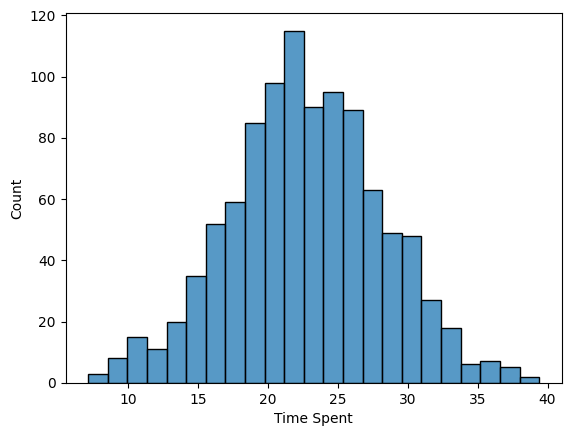

In [54]:
sns.histplot(data=df, x='Time Spent')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

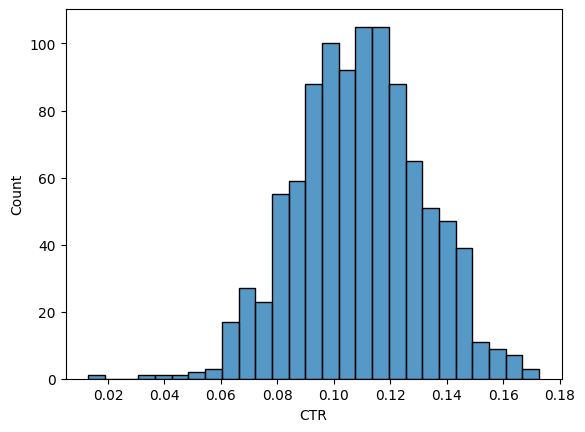

In [55]:
sns.histplot(data=df, x='CTR')
plt.show

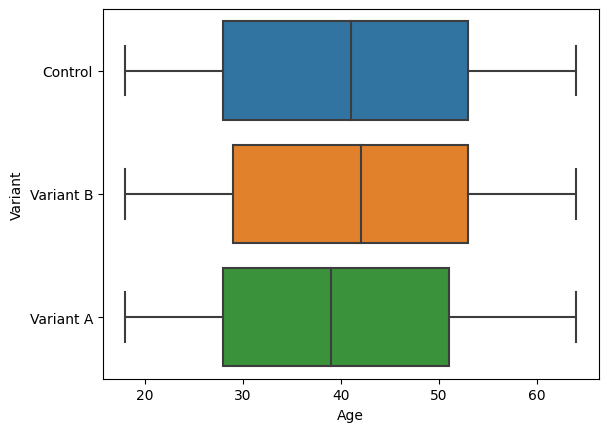

In [53]:
sns.boxplot(data=df, x = "Age", y="Variant")
plt.show()

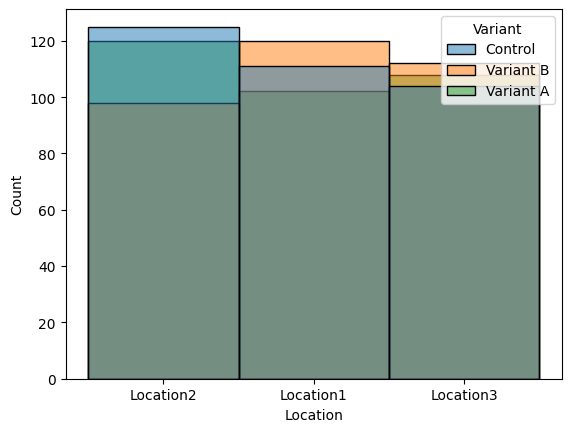

In [23]:
sns.histplot(data=df, x = "Location", hue="Variant")
plt.show()

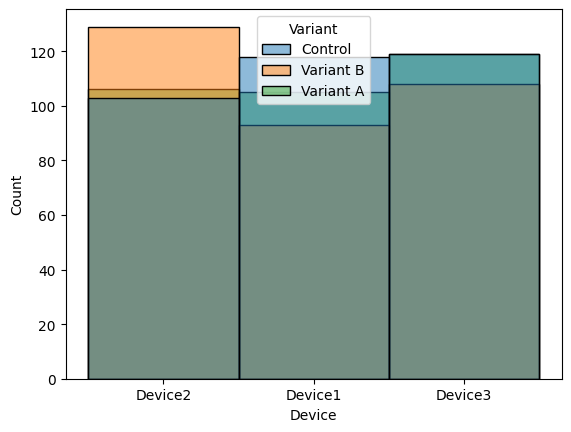

In [18]:
sns.histplot(data=df, x = "Device", hue="Variant")
plt.show()

<Axes: xlabel='Variant', ylabel='Time Spent'>

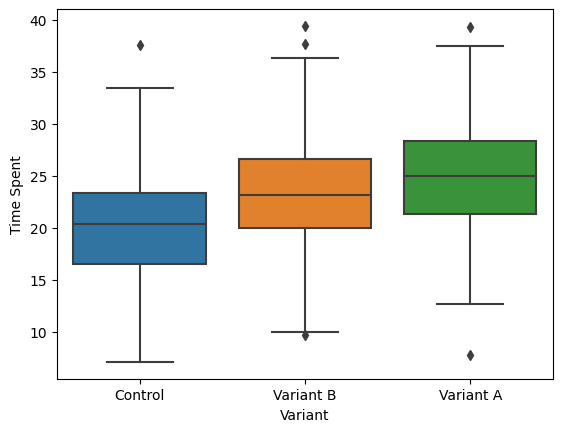

In [56]:
sns.boxplot(data=df, y='Time Spent', x='Variant')

<Axes: xlabel='Variant', ylabel='CTR'>

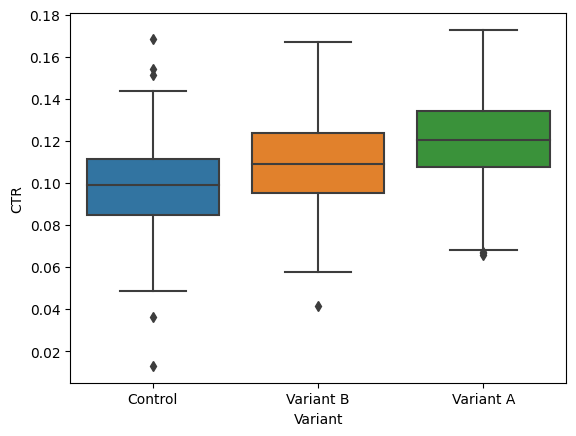

In [57]:
sns.boxplot(data=df, y='CTR', x='Variant')

In [58]:
# define the test variable for time spent and CTR

time_ctrl = df[df['Variant'] == 'Control']['Time Spent']
time_varA = df[df['Variant'] == 'Variant A']['Time Spent']
time_varB = df[df['Variant'] == 'Variant B']['Time Spent']

ctr_ctrl = df[df['Variant'] == 'Control']['CTR']
ctr_varA = df[df['Variant'] == 'Variant A']['CTR']
ctr_varB = df[df['Variant'] == 'Variant B']['CTR']


In [63]:
# perform t-test for any significant difference on time spent between control group and variant A

t_stat, p_val = stats.ttest_ind(time_ctrl, time_varA)
print(f"T-statistic_timespent: {t_stat}")
print(f"P-value_timespent: {p_val}")

t_stat, p_val = stats.ttest_ind(ctr_ctrl, ctr_varA)
print(f"T-statistic_ctr: {t_stat}")
print(f"P-value_ctr: {p_val}")

T-statistic_timespent: -12.142363487472364
P-value_timespent: 8.488565644996449e-31
T-statistic_ctr: -13.829424737499187
P-value_ctr: 1.9602781373243157e-38


In [64]:
# perform t-test for any significant difference on time spent between control group and variant B

t_stat, p_val = stats.ttest_ind(time_ctrl, time_varB)
print(f"T-statistic_timespent: {t_stat}")
print(f"P-value_timespent: {p_val}")

t_stat, p_val = stats.ttest_ind(ctr_ctrl, ctr_varB)
print(f"T-statistic_ctr: {t_stat}")
print(f"P-value_ctr: {p_val}")

T-statistic_timespent: -8.174237395991806
P-value_timespent: 1.496358076285182e-15
T-statistic_ctr: -6.4718143491783255
P-value_ctr: 1.8743198199982106e-10


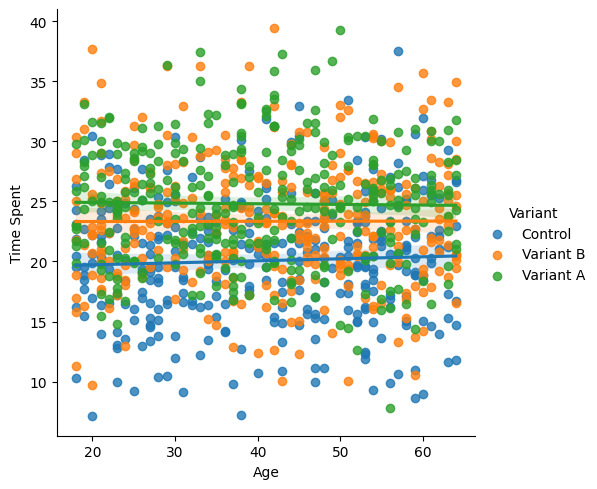

In [48]:
sns.lmplot(data = df, x='Age', y='Time Spent', hue='Variant')

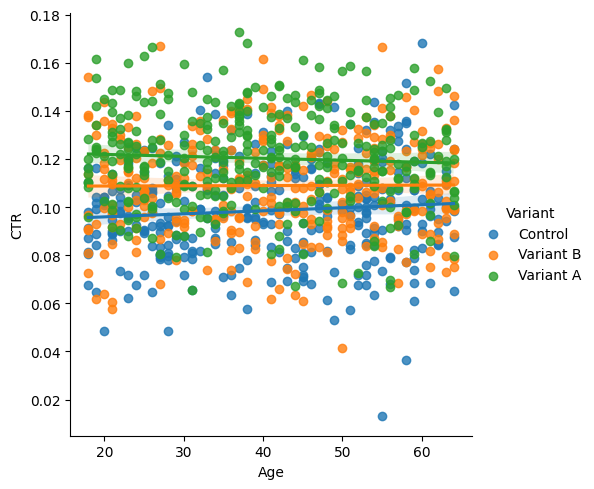

In [65]:
sns.lmplot(data = df, x='Age', y='CTR', hue='Variant')

In [66]:
# perform AVONA test to see if there is significant difference between the three groups

f_stat, p_val = stats.f_oneway(time_ctrl, time_varA, time_varB)

print(f"F-statistic_timespent: {f_stat}")
print(f"P-value_timespent: {p_val}")

f_stat, p_val = stats.f_oneway(ctr_ctrl, ctr_varA, ctr_varB)

print(f"F-statistic_ctr: {f_stat}")
print(f"P-value_ctr: {p_val}")

F-statistic_timespent: 75.60840947416146
P-value_timespent: 2.676826588910432e-31
F-statistic_ctr: 93.588915936227
P-value_ctr: 5.638952705781955e-38


In [67]:
# perform non-parametric test Mann-Whitney to verify the significance of difference (VarA)

U_stat, p_val = stats.mannwhitneyu(time_ctrl, time_varA)

print(f"U-statistic_timespent: {U_stat}")
print(f"P-value_timespent: {p_val}")

U_stat, p_val = stats.mannwhitneyu(ctr_ctrl, ctr_varA)

print(f"U-statistic_ctr: {U_stat}")
print(f"P-value_ctr: {p_val}")

U-statistic_timespent: 28632.0
P-value_timespent: 5.562212497183173e-28
U-statistic_ctr: 24691.0
P-value_ctr: 4.5386476657856684e-36


In [68]:
# perform non-parametric test Mann-Whitney to verify the significance of difference (VarB)

U_stat, p_val = stats.mannwhitneyu(time_ctrl, time_varB)

print(f"U-statistic_timespent: {U_stat}")
print(f"P-value_timespent: {p_val}")

U_stat, p_val = stats.mannwhitneyu(ctr_ctrl, ctr_varB)

print(f"U-statistic_ctr: {U_stat}")
print(f"P-value_ctr: {p_val}")

U-statistic_timespent: 36895.0
P-value_timespent: 1.7581219452410357e-14
U-statistic_ctr: 40330.0
P-value_ctr: 3.058203406783743e-10


In [69]:
# perform non-parametric test Mann-Whitney to verify the relationship

H, pval = stats.kruskal(time_ctrl, time_varA, time_varB)

print('The test statistic_timespent:', H)
print('The p-value of the test_timespent:', pval)

H, pval = stats.kruskal(ctr_ctrl, ctr_varA, ctr_varB)

print('The test statistic_ctr:', H)
print('The p-value of the test_ctr:', pval)

The test statistic_timespent: 128.94233881092123
The p-value of the test_timespent: 1.0012139345955057e-28
The test statistic_ctr: 162.2144623750578
The p-value of the test_ctr: 5.964541337211197e-36
